In [1]:
import sys
import pandas
import numpy
import matplotlib
import seaborn
import scipy
import sklearn



In [2]:
print('python:  {}',format(sys.version))
print('pandas:  {}',format(pandas.__version__))
print('numpy:  {}',format(numpy.__version__))
print('matplotlib:  {}',format(matplotlib.__version__))
print('seaborn:  {}',format(seaborn.__version__))
print('scipy:  {}',format(scipy.__version__))
print('sklearn:  {}',format(sklearn.__version__))

python:  {} 3.6.3 |Anaconda, Inc.| (default, Oct 15 2017, 03:27:45) [MSC v.1900 64 bit (AMD64)]
pandas:  {} 0.20.3
numpy:  {} 1.14.2
matplotlib:  {} 2.1.0
seaborn:  {} 0.8.0
scipy:  {} 0.19.1
sklearn:  {} 0.19.1


In [16]:
#import the neccesary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
#load the dataset
data=pd.read_csv("creditcard.csv")

In [5]:
#explore the dataset
print(data.columns)

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')


In [6]:
print(data.shape)

(284807, 31)


In [8]:
print (data.describe())

                Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  3.919560e-15  5.688174e-16 -8.769071e-15  2.782312e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean  -1.552563e-15  2.010663e-15 -1.694249e-15 -1.927028e-16 -3.137024e-15   
std    1.380247e+00  1.332271e+00  1.23709

In [9]:
data=data.sample(frac=.1,random_state=1)
print(data.shape)

(28481, 31)


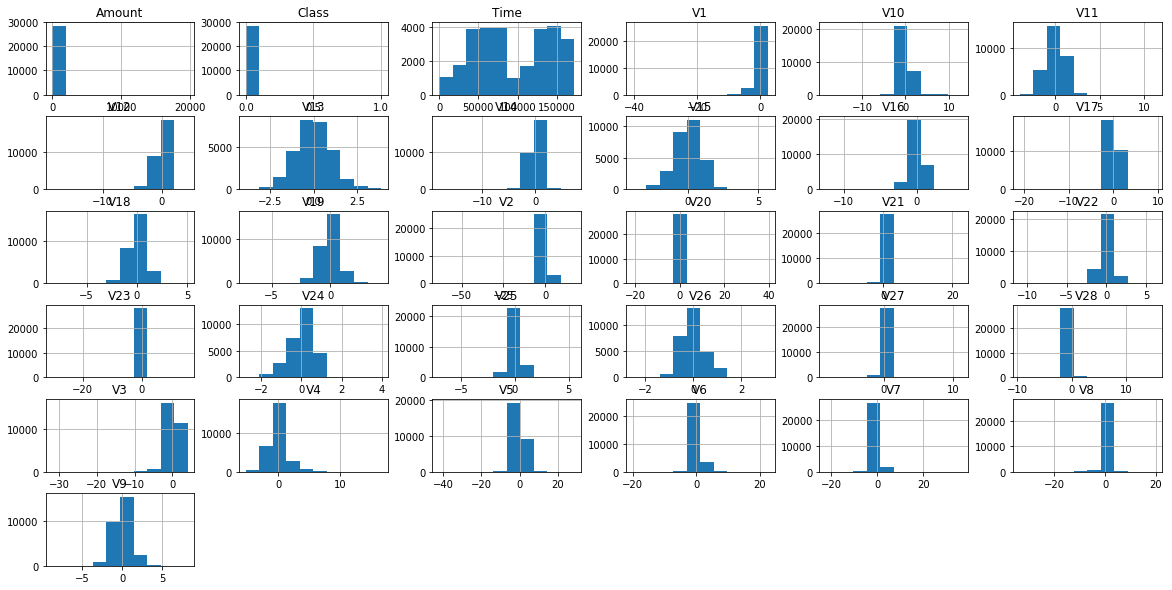

In [75]:
#plot the histogram of each parameter
data.hist(figsize=(20,10))
plt.show()

In [12]:
#determine number of fraud cases in dataset
fraud=data[data['Class']==1]
valid=data[data['Class']==0]

outlier_fraction=len(fraud)/float(len(valid))
print(outlier_fraction)

print('fraud cases: {}',format(len(fraud)))
print('valid: {}',format(len(valid)))


0.0017234102419808666
fraud cases: {} 49
valid: {} 28432


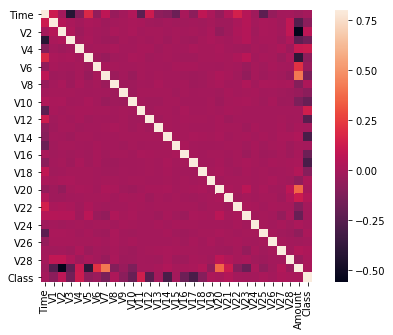

In [76]:
#correlation matrix
corrmat=data.corr()
fig=plt.figure(figsize=(8,5))
sns.heatmap(corrmat,vmax=.8,square=True)
plt.show()

In [26]:
#get all the columns from datfreame
columns=data.columns.tolist()

#filter the columns to remove data we do not want
coulmns=[c for c in columns if c not in ['Class']]

#store the variable we'll be predicting on
target="Class"

X=data[columns]
Y=data[target]

#print the shape of X and Y
print(X.shape)
print(Y.shape)

(28481, 31)
(28481,)


In [65]:
from sklearn.metrics import classification_report,accuracy_score
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor

#define a random state
state=1

# define yhe outliet detection methods
classifiers={"Isolation Forest":
             IsolationForest(max_samples=len(X),
             contamination=outlier_fraction,
             random_state=state)
           # "Local Outlier Factor":LocalOutlierFactor(n_neighbors=20,contamination=outlier_fraction)
            }

In [72]:
# fit the model
n_outliers = len(fraud)

for i, (clf_name, clf) in enumerate(classifiers.items()):

    # fit the data and tag outliers
#     if clf_name == "Local Outlier Factor":
#         y_pred = clf.fit_predict(X)
       
#         scores_pred = clf.negative_outlier_factor_
       
#     else:
        clf.fit(X)
        scores_pred = clf.decision_function(X)
        y_pred = clf.predict(X)
       
    # Reshape the prediction values to 0 for valid and 1 for fraud
        y_pred[y_pred == 1] = 0
        y_pred[y_pred == -1] = 1

        n_errors = (y_pred != Y).sum()


# run classification metrics 

print('{}:{}'.format(clf_name, n_errors))
print(str(accuracy_score(Y, y_pred )*100)+"%")
print(classification_report(Y, y_pred ))

Isolation Forest:63
99.77879990168884%
             precision    recall  f1-score   support

          0       1.00      1.00      1.00     28432
          1       0.36      0.37      0.36        49

avg / total       1.00      1.00      1.00     28481

